In [ ]:
!pip install sklearn
!pip install pandas
!pip install tensorflow
!pip install matplotlib

In [20]:
import numpy as np
import pandas as pd
import os
import tensorflow as tf
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# read iris.csv file using pandas
iris_data = pd.read_csv('iris.csv')

# read the head of csv and print
iris_data.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [21]:
# Here label is 'Species' column and features are all the other columns
# Convert 'Species' column to numeric value

# Use label encoder function using sklearn
from sklearn import preprocessing

# Use instance of LabelEncoder
label_encoder = preprocessing.LabelEncoder()

# fit_transform function helps in transforming string labels to numerics
iris_data['Species'] = label_encoder.fit_transform(iris_data['Species'])

# Convert iris_data to numpy array
iris_data = iris_data.to_numpy()


In [22]:

# Seperate labels and features
x_data = iris_data[:,:4]
y_data = iris_data[:,4]

print("\nFeatures before scaling :\n----------------------")
print(x_data[:5,:])
print("\nTargets before scaling :\n------------------------")
print(y_data[:5])


Features before scaling :
----------------------
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]

Targets before scaling :
------------------------
[0. 0. 0. 0. 0.]


In [23]:
# Perform feature scaling in order to normalise the features for our ML model
# Create a scaler model that is fit on the input data
scaler = StandardScaler().fit(x_data)

# Scale the numeric feature variables
x_data = scaler.transform(x_data)

# Convert target variables to one-hot-encoding array
y_data = tf.keras.utils.to_categorical(y_data,3)

print("\nFeatures after scaling :\n----------------------")
print(x_data[:5,:])
print("\nTargets after scaling :\n----------------------")
print(y_data[:5])


Features after scaling :
----------------------
[[-0.90068117  1.01900435 -1.34022653 -1.3154443 ]
 [-1.14301691 -0.13197948 -1.34022653 -1.3154443 ]
 [-1.38535265  0.32841405 -1.39706395 -1.3154443 ]
 [-1.50652052  0.09821729 -1.2833891  -1.3154443 ]
 [-1.02184904  1.24920112 -1.34022653 -1.3154443 ]]

Targets after scaling :
----------------------
[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]]


In [25]:
# Split the training and test data
x_train,x_test,y_train,y_test = train_test_split(x_data,y_data,test_size=0.10)
print("\nTrain and Test Dimensions:\n--------------------------------")
print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)


Train and Test Dimensions:
--------------------------------
(135, 4) (135, 3) (15, 4) (15, 3)


**Creating a Model**

Creating a model in keras requires defining the following

1. Number of hidden layers.
2. Number of nodes in each layer.
3. Activation functions.
4. Loss function and accuracy measurements.

In [26]:
from tensorflow import keras

# Number of classes in the target variable
NB_classes = 3

# Create a sequential model in the keras
model = tf.keras.models.Sequential()

# Add the first hidden layer
model.add(keras.layers.Dense(128,   # number of nodes
                             input_shape = (4,), # number of input variables
                             name = "Hidden-Layer-1", # logical name
                             activation = 'relu')) # activation function

# Add the second hidden layer
model.add(keras.layers.Dense(128,
                             name="Hidden-Layer-2",
                             activation='relu'))

# Add the output layer with softmax activation
model.add(keras.layers.Dense(NB_classes,
                            name="Output-Layer",
                            activation='softmax'))

# Compile the model with loss & metrics
model.compile(loss='categorical_crossentropy',
             metrics=['accuracy'])

# Print the model meta-data
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Hidden-Layer-1 (Dense)      (None, 128)               640       
                                                                 
 Hidden-Layer-2 (Dense)      (None, 128)               16512     
                                                                 
 Output-Layer (Dense)        (None, 3)                 387       
                                                                 
Total params: 17,539
Trainable params: 17,539
Non-trainable params: 0
_________________________________________________________________


**Training and Evaluating the Model**


Training the model involves defining various training models and then perform forward and backward propogation

In [27]:
# Make Verbose as 1,so as to see detailed logging info - Model explains each and everything that is going on
VERBOSE = 1

# Setup the Hyper parameters for training

# set the batch size
BATCH_SIZE = 16
# set number of epochs
EPOCHS = 10
# set validation split. set 20% of training data to validation
VALIDATION_SPLIT = 0.2

print("\nTraining Progress:\n------------------------")

# fit the model. This will perform entire training cycle, including
# forward propogation, loss computation, backward propogation, gradient descent
# execute for the specified batch sized and epoch
# perform validation after each epoch

history = model.fit(x_train,
                    y_train,
                    batch_size=BATCH_SIZE,
                    epochs=EPOCHS,
                    validation_split=VALIDATION_SPLIT)



Training Progress:
------------------------
Epoch 1/10
1/7 [===>..........................] - ETA: 0s - loss: 1.0350 - accuracy: 0.3125

2023-11-15 19:23:58.390038: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


7/7 [==============================] - 0s 11ms/step - loss: 0.8099 - accuracy: 0.7222 - val_loss: 0.5251 - val_accuracy: 0.9259
Epoch 2/10
7/7 [==============================] - 0s 2ms/step - loss: 0.5431 - accuracy: 0.8333 - val_loss: 0.3789 - val_accuracy: 0.8889
Epoch 3/10
7/7 [==============================] - 0s 2ms/step - loss: 0.4318 - accuracy: 0.8519 - val_loss: 0.3051 - val_accuracy: 0.8889
Epoch 4/10
7/7 [==============================] - 0s 2ms/step - loss: 0.3686 - accuracy: 0.8519 - val_loss: 0.2716 - val_accuracy: 0.8889
Epoch 5/10
7/7 [==============================] - 0s 2ms/step - loss: 0.3244 - accuracy: 0.8611 - val_loss: 0.2499 - val_accuracy: 0.8889
Epoch 6/10
7/7 [==============================] - 0s 2ms/step - loss: 0.2890 - accuracy: 0.8611 - val_loss: 0.2384 - val_accuracy: 0.8889
Epoch 7/10
7/7 [==============================] - 0s 2ms/step - loss: 0.2644 - accuracy: 0.8796 - val_loss: 0.2207 - val_accuracy: 0.8889
Epoch 8/10
7/7 [============================


Accuracy during Training:
------------------


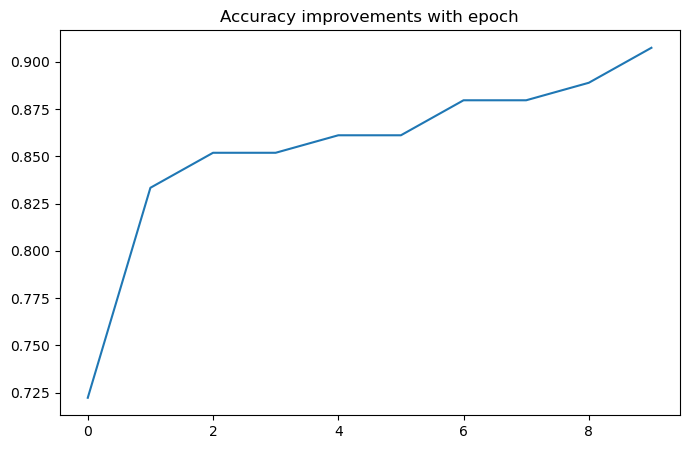

In [28]:
print("\nAccuracy during Training:\n------------------")
import matplotlib.pyplot as plt

# plot accuracy of model after each epoch
pd.DataFrame(history.history)["accuracy"].plot(figsize=(8,5))
plt.title("Accuracy improvements with epoch")
plt.show()

In [29]:
# Evaluate the model against test datasets and print results
print("\nEvaluating against Test Data\n----------------")
model.evaluate(x_test,y_test)


Evaluating against Test Data
----------------
1/1 [==============================] - 0s 18ms/step - loss: 0.3143 - accuracy: 0.9333


[0.3143291175365448, 0.9333333373069763]

**Saving and Loading Models**

The training and inference environments are usually seperate. Models need to be saved after they are validated. They are then loaded to inference environments for actual prediction

In [30]:
# Save the model
model.save('iris_save')

# load the model
loaded_model = keras.models.load_model('iris_save')

# print model summary
loaded_model.summary()

INFO:tensorflow:Assets written to: iris_save/assets


INFO:tensorflow:Assets written to: iris_save/assets


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Hidden-Layer-1 (Dense)      (None, 128)               640       
                                                                 
 Hidden-Layer-2 (Dense)      (None, 128)               16512     
                                                                 
 Output-Layer (Dense)        (None, 3)                 387       
                                                                 
Total params: 17,539
Trainable params: 17,539
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Let's do some raw prediction
prediction_input = [[6.6, 3., 4.4, 1.4]]

# scale the input
scaled_input = scaler.transform(prediction_input)

# Get raw prediction probabilities for each category
raw_prediction = model.predict(scaled_input)
print("Raw Predicition Output for each category: ",raw_prediction)

# Get the argmax in raw_predicition and get the output
prediction = np.argmax(raw_prediction)
print("Prediction is: ",label_encoder.inverse_transform(prediction))